## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice_number = merged_data["Mouse ID"].unique()
mice_number = len(mice_number)
mice_number

249

In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint. 

# duplicated_mice = merged_data.copy()

# duplicate_mice = duplicated_mice[["Mouse ID", "Timepoint"]].drop_duplicates()
# duplicate_mice

duplicate_mice = merged_data.loc[merged_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_data=pd.DataFrame(duplicate_mice)
all_duplicate_data

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

revised_mice_df = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
revised_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mice_number = revised_mice_df["Mouse ID"].unique()
clean_mice_number = len(clean_mice_number)
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = revised_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#mean

median = revised_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#median

variance = revised_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#variance

std = revised_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#std

sem = revised_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#sem


summ_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std,
    "SEM": sem
})

summ_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = revised_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#mean

median = revised_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#median

variance = revised_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#variance

std = revised_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#std

sem = revised_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#sem

# Using the aggregation method, produce the same summary statistics in a single line

extra_revised = revised_mice_df.drop(columns=['Mouse ID', 'Sex'])

df_group_by = extra_revised.groupby('Drug Regimen')
summary_stats_agg = df_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoint'>

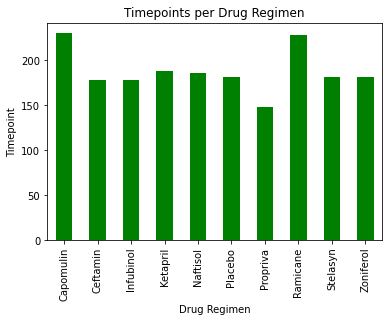

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_revised = revised_mice_df.drop(columns=['Mouse ID', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'])

bar_revised_group = bar_revised.groupby(['Drug Regimen']).count()['Timepoint']

pandas_plot = bar_revised_group.plot.bar(color='g')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint')
plt.title('Timepoints per Drug Regimen')
pandas_plot


In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_list = (Combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list




In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
